# Stop & Frisk Data Analysis

In this lab we're going to continue to explore the NYC Stop & Frisk data from 2012.  Start by moving the CSV file you downloaded for lab 2 into this directory.  Still - DO NOT add the CSV to git!

## Setup...

Importing and doing other setup.

In [493]:
# a library that gives us exciting visualization tools!
import seaborn  

# make the visualizations show up in jupyter
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The same get_data function as in the last lab:

In [494]:
"""
Takes a filename and returns your data.
For example, with a file that looks like this:
header1, header2, header3
1,2,3
4,5,6

You could get the first row, second header item TypeError: cannot perform reduce with flexible typelike this:
dict = get_data("temp.csv")
print dict[1]["header2"]

For the interested, the returned data is a dictionary of dictionaries.  We'll see this more in future weeks.
"""
def get_data(filename):
    filepointer = open(filename, "r")
    data = []
    
    # get_header, inline instead of calling the function above so that the file continues reading
    # from the line right after the header in the for loop below.
    line = filepointer.readline()
    header = line.strip().split(",")

    for line in filepointer:
        fields = line.strip().split(",")

        # Unfortunately, split will split at some commas that we don't mean to split on (e.g., if they've
        # been written into addresses) so we check below to make sure we have the expected number of fields
        # and throw out any other data.  We shouldn't really be throwing out data, we should be fixing the
        # actual problem, but for the purposes of this lab, this will do.
        if (len(fields) == len(header)):
            row = {}
            for fieldNumber in range(len(fields)):
                row[header[fieldNumber]] = fields[fieldNumber]
            data.append(row)
            
    filepointer.close()
    return data

## Let's examine age
We're going to start by continuing our exploration from the last lab of the attribute age.

In [495]:
# Read in the data from the file where you've stored it (change the file name as necessary):
data = get_data("SQF_2012.csv")

** 1) It's going to be useful to be able to get a *column* from the data.  In order to do that, you should make a function that takes the data and a column name and returns a list of everything in that column.  You'll need to make one version of this function for each *type* column that we're interested in, since you should return a list where the data items are of the correct type.**

** 2) Once you've made that function, use it to get the column of ages. **

In [524]:
"""
Function takes a column name from data and returns the contents in a list
"""
def get_column(data, column_name):
    column_data = []
    for row in data:
        column_data.append(int(row[column_name]))
    return column_data
        

In [504]:
get_column(data, "age")

[20,
 18,
 19,
 37,
 21,
 62,
 31,
 20,
 21,
 34,
 18,
 18,
 21,
 26,
 20,
 19,
 21,
 23,
 54,
 27,
 19,
 17,
 21,
 31,
 19,
 58,
 24,
 38,
 68,
 29,
 24,
 21,
 16,
 19,
 17,
 26,
 24,
 35,
 15,
 28,
 23,
 31,
 18,
 21,
 13,
 31,
 45,
 20,
 17,
 28,
 22,
 30,
 43,
 18,
 24,
 22,
 22,
 19,
 22,
 46,
 24,
 17,
 18,
 21,
 22,
 21,
 18,
 20,
 36,
 62,
 42,
 34,
 22,
 30,
 41,
 19,
 39,
 17,
 17,
 17,
 26,
 14,
 18,
 22,
 17,
 21,
 23,
 23,
 19,
 22,
 18,
 34,
 55,
 16,
 30,
 23,
 26,
 25,
 19,
 24,
 31,
 26,
 20,
 19,
 17,
 45,
 21,
 21,
 42,
 51,
 48,
 24,
 27,
 17,
 41,
 30,
 47,
 16,
 18,
 34,
 31,
 18,
 20,
 52,
 18,
 31,
 22,
 20,
 16,
 25,
 16,
 26,
 16,
 21,
 24,
 20,
 20,
 26,
 16,
 53,
 24,
 21,
 22,
 22,
 15,
 28,
 32,
 18,
 22,
 16,
 18,
 29,
 43,
 20,
 17,
 18,
 51,
 27,
 15,
 31,
 32,
 31,
 39,
 26,
 21,
 26,
 22,
 20,
 25,
 20,
 30,
 15,
 40,
 19,
 60,
 57,
 31,
 32,
 18,
 45,
 46,
 21,
 17,
 21,
 50,
 48,
 60,
 20,
 15,
 16,
 20,
 57,
 24,
 22,
 24,
 16,
 20,
 48,
 61,
 21,


** 3) Use seaborn's distplot and boxplot functions to graph the age column. **

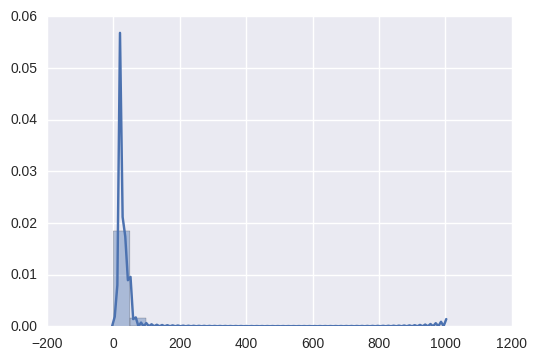

In [505]:
age_list= get_column(data, "age")

"""
Function graphs data from age_list
"""
seaborn.distplot(age_list, bins=20)

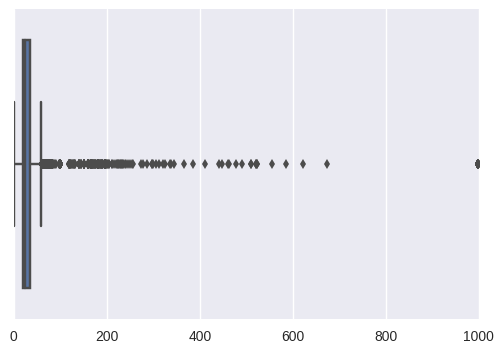

In [506]:
"""
Function graphs data from age_list
"""
seaborn.boxplot(age_list)

** 4) Describe what you notice about the above plots. **

*There are unrealistic ages upto 1000 years and ages as low as 2 included in the data which is misleading.*


** 5) Decide what entries should be removed and re-plot the data (both distplot and boxplot) without those ages. **

In [507]:
#Realistic ages in the NYC data set,would rationally range from 10, at the least, to 120 at the highest.

age_list= get_column(data, "age")

def get_age(any_list):
    new_list = []
    for ages in any_list:
        if ages > 10 and ages < 120 :
            new_list.append(ages)
    return new_list

get_age(age_list)

[20,
 18,
 19,
 37,
 21,
 62,
 31,
 20,
 21,
 34,
 18,
 18,
 21,
 26,
 20,
 19,
 21,
 23,
 54,
 27,
 19,
 17,
 21,
 31,
 19,
 58,
 24,
 38,
 68,
 29,
 24,
 21,
 16,
 19,
 17,
 26,
 24,
 35,
 15,
 28,
 23,
 31,
 18,
 21,
 13,
 31,
 45,
 20,
 17,
 28,
 22,
 30,
 43,
 18,
 24,
 22,
 22,
 19,
 22,
 46,
 24,
 17,
 18,
 21,
 22,
 21,
 18,
 20,
 36,
 62,
 42,
 34,
 22,
 30,
 41,
 19,
 39,
 17,
 17,
 17,
 26,
 14,
 18,
 22,
 17,
 21,
 23,
 23,
 19,
 22,
 18,
 34,
 55,
 16,
 30,
 23,
 26,
 25,
 19,
 24,
 31,
 26,
 20,
 19,
 17,
 45,
 21,
 21,
 42,
 51,
 48,
 24,
 27,
 17,
 41,
 30,
 47,
 16,
 18,
 34,
 31,
 18,
 20,
 52,
 18,
 31,
 22,
 20,
 16,
 25,
 16,
 26,
 16,
 21,
 24,
 20,
 20,
 26,
 16,
 53,
 24,
 21,
 22,
 22,
 15,
 28,
 32,
 18,
 22,
 16,
 18,
 29,
 43,
 20,
 17,
 18,
 51,
 27,
 15,
 31,
 32,
 31,
 39,
 26,
 21,
 26,
 22,
 20,
 25,
 20,
 30,
 15,
 40,
 19,
 60,
 57,
 31,
 32,
 18,
 45,
 46,
 21,
 17,
 21,
 50,
 48,
 60,
 20,
 15,
 16,
 20,
 57,
 24,
 22,
 24,
 16,
 20,
 48,
 61,
 21,


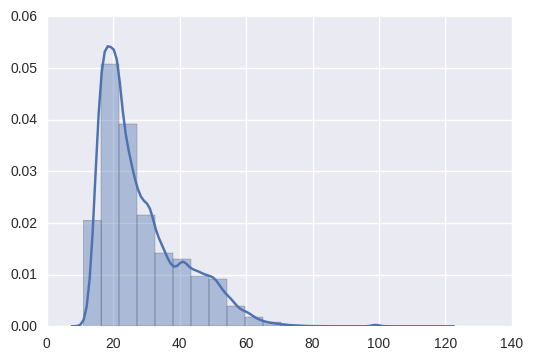

In [508]:
"""
Function graphs data from new age_list without bogus values
"""
new_age_list = get_age(age_list)
seaborn.distplot(new_age_list, bins=20)

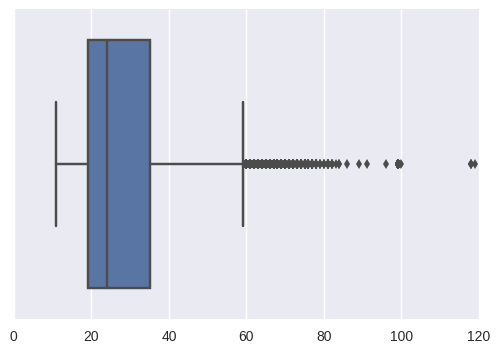

In [509]:
"""
Function graphs data from  new age_list without bogus values
"""
new_age_list = get_age(age_list)
seaborn.boxplot(new_age_list)

** 6) Instead of removing the unknown ages, replace them first with the mean and second with a random value from the age column (not including the bogus values).  Then, again, use distplot and box plot to look at the results.  Describe what you see. **

In [510]:
"""
Function takes an input list and returns the mean of the list
"""
def mean_age(age_list):
    no_ages = len(age_list)  # total number of ages in the entire list
    summ = 0
    for ages in age_list:
        summ += ages
        
    mean = (summ + .0) / no_ages
    return mean

mean_age = mean_age(age_list)
print mean_age


28.9443749954


In [511]:
"""
Function takes any list and makes a new list with only values that are realistic ages & replaces bogus values with mean
"""
def replaced_list(any_list):
    new_list=[]
    for ages in any_list:
        if ages > 10 and ages < 120 :
            new_list.append(ages)
        if ages < 10 and ages > 120 :
            new_list.append(mean_age)
    return new_list

replaced_list(age_list)
    

[20,
 18,
 19,
 37,
 21,
 62,
 31,
 20,
 21,
 34,
 18,
 18,
 21,
 26,
 20,
 19,
 21,
 23,
 54,
 27,
 19,
 17,
 21,
 31,
 19,
 58,
 24,
 38,
 68,
 29,
 24,
 21,
 16,
 19,
 17,
 26,
 24,
 35,
 15,
 28,
 23,
 31,
 18,
 21,
 13,
 31,
 45,
 20,
 17,
 28,
 22,
 30,
 43,
 18,
 24,
 22,
 22,
 19,
 22,
 46,
 24,
 17,
 18,
 21,
 22,
 21,
 18,
 20,
 36,
 62,
 42,
 34,
 22,
 30,
 41,
 19,
 39,
 17,
 17,
 17,
 26,
 14,
 18,
 22,
 17,
 21,
 23,
 23,
 19,
 22,
 18,
 34,
 55,
 16,
 30,
 23,
 26,
 25,
 19,
 24,
 31,
 26,
 20,
 19,
 17,
 45,
 21,
 21,
 42,
 51,
 48,
 24,
 27,
 17,
 41,
 30,
 47,
 16,
 18,
 34,
 31,
 18,
 20,
 52,
 18,
 31,
 22,
 20,
 16,
 25,
 16,
 26,
 16,
 21,
 24,
 20,
 20,
 26,
 16,
 53,
 24,
 21,
 22,
 22,
 15,
 28,
 32,
 18,
 22,
 16,
 18,
 29,
 43,
 20,
 17,
 18,
 51,
 27,
 15,
 31,
 32,
 31,
 39,
 26,
 21,
 26,
 22,
 20,
 25,
 20,
 30,
 15,
 40,
 19,
 60,
 57,
 31,
 32,
 18,
 45,
 46,
 21,
 17,
 21,
 50,
 48,
 60,
 20,
 15,
 16,
 20,
 57,
 24,
 22,
 24,
 16,
 20,
 48,
 61,
 21,


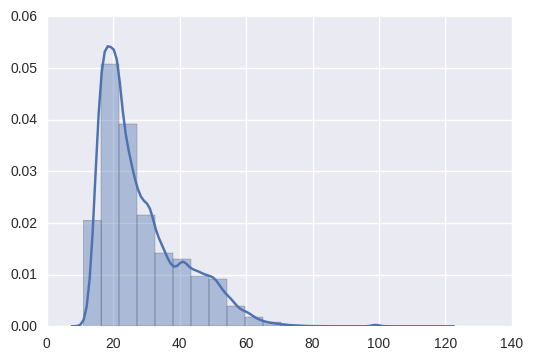

In [512]:
"""
Function graphs data from  new age_list with replaced bogus values with mean
"""
meanrp_list = replaced_list(age_list)
seaborn.distplot(meanrp_list, bins = 20)


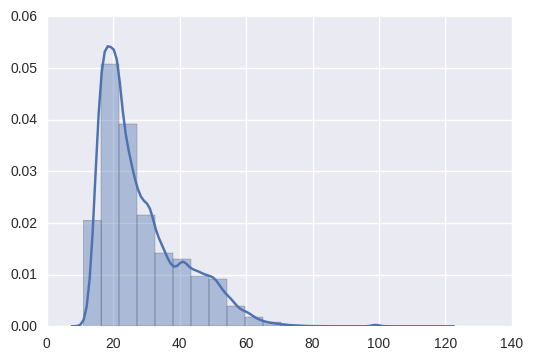

In [513]:
"""
Function graphs data from  new age_list with random values replacing bogus values
"""
seaborn.distplot(randomrp_list, bins = 20)

In [514]:
"""
Function takes any list, makes a new list with realistic ages from data,replaces bad values with a random number form the list 
"""
import random
def replaced_list(any_list):
    new_list=[]    
    for ages in any_list:
        if ages > 10 and ages < 120 :
            new_list.append(ages)
        if ages < 10 and ages > 120 :
            random_value = random.choice(any_list)
            new_list.append(random_value)
    return new_list

replaced_list(age_list)

[20,
 18,
 19,
 37,
 21,
 62,
 31,
 20,
 21,
 34,
 18,
 18,
 21,
 26,
 20,
 19,
 21,
 23,
 54,
 27,
 19,
 17,
 21,
 31,
 19,
 58,
 24,
 38,
 68,
 29,
 24,
 21,
 16,
 19,
 17,
 26,
 24,
 35,
 15,
 28,
 23,
 31,
 18,
 21,
 13,
 31,
 45,
 20,
 17,
 28,
 22,
 30,
 43,
 18,
 24,
 22,
 22,
 19,
 22,
 46,
 24,
 17,
 18,
 21,
 22,
 21,
 18,
 20,
 36,
 62,
 42,
 34,
 22,
 30,
 41,
 19,
 39,
 17,
 17,
 17,
 26,
 14,
 18,
 22,
 17,
 21,
 23,
 23,
 19,
 22,
 18,
 34,
 55,
 16,
 30,
 23,
 26,
 25,
 19,
 24,
 31,
 26,
 20,
 19,
 17,
 45,
 21,
 21,
 42,
 51,
 48,
 24,
 27,
 17,
 41,
 30,
 47,
 16,
 18,
 34,
 31,
 18,
 20,
 52,
 18,
 31,
 22,
 20,
 16,
 25,
 16,
 26,
 16,
 21,
 24,
 20,
 20,
 26,
 16,
 53,
 24,
 21,
 22,
 22,
 15,
 28,
 32,
 18,
 22,
 16,
 18,
 29,
 43,
 20,
 17,
 18,
 51,
 27,
 15,
 31,
 32,
 31,
 39,
 26,
 21,
 26,
 22,
 20,
 25,
 20,
 30,
 15,
 40,
 19,
 60,
 57,
 31,
 32,
 18,
 45,
 46,
 21,
 17,
 21,
 50,
 48,
 60,
 20,
 15,
 16,
 20,
 57,
 24,
 22,
 24,
 16,
 20,
 48,
 61,
 21,


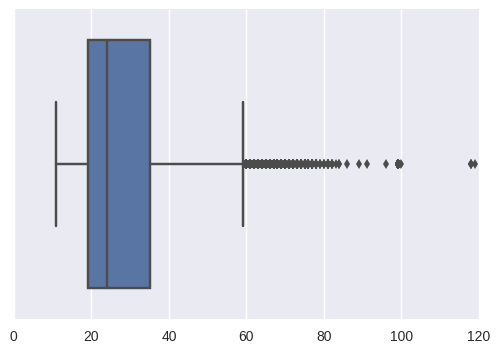

In [515]:
"""
Function graphs data from  replaced list with random values replacing bogus values
"""
randomrp_list = replaced_list(age_list)
seaborn.boxplot(randomrp_list)

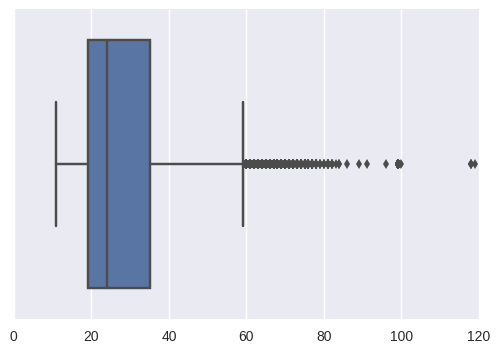

In [516]:
"""
Function graphs data from  replaced_list with mean values replacing bogus values
"""
seaborn.boxplot(meanrp_list)

*Both results after replacing bogus values with a random value and the mean appear similiar to the results when bogus values are entirely removed. This may imply that bogus values were not big enough to give a overly skewed representation of the data.*

## Now let's examine race

** 7) Create a histogram showing the number of stops per race. **

In [525]:
def get_column(data, column_name):
    column_data = []
    for row in data:
        column_data.append(row[column_name])
    return column_data

race_list = get_column(data, "race")


"""
Function takes race_list, gets the total stops per race
"""
def stops_per_race(race_list):
    all_races = []
    for race in race_list:
        if race == "1":
            all_races.append("Black")
        if race == "2":
            all_races.append("Black_Hispanics")
        if race == "3":
            all_races.append("White_Hispanics")
        if race == "4":
            all_races.append("white")           
        if race == "5":
            all_races.append("Asian_Pacific_Islander")            
        if race == "6":
            all_races.append("Indian_Native_Alaskan")
    return all_races

stops_per_race(race_list)
            
        

['Black',
 'White_Hispanics',
 'Black',
 'Black',
 'White_Hispanics',
 'Black',
 'White_Hispanics',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'white',
 'White_Hispanics',
 'Black',
 'Black',
 'Black',
 'Black',
 'White_Hispanics',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'White_Hispanics',
 'Black',
 'Black',
 'Black',
 'Black',
 'White_Hispanics',
 'Black',
 'Black',
 'Black',
 'Black',
 'White_Hispanics',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'White_Hispanics',
 'White_Hispanics',
 'White_Hispanics',
 'White_Hispanics',
 'Black',
 'Black',
 'Black',
 'Black',
 'White_Hispanics',
 'White_Hispanics',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'Black',
 'White_Hispanics',
 'White_Hispanics',
 'Black',
 'White_Hispanics',
 'White_Hispanics',
 'White_Hispanics',
 'White_Hispanics',
 'Black',
 'Black',
 'Black',


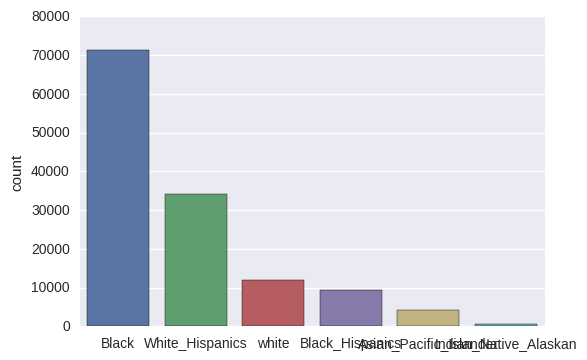

In [520]:
"""
Function graphs the total number of stops for each race
"""
all_races = stops_per_race(race_list)
seaborn.countplot(all_races)

** 8) Design and implement a visualization that will let you examine the percent of weapons found in stops per race. **

In [521]:
"""
Function evaluates the percentage of weapons from each race
"""
def weapons_per_race():
    race_total = []
    percent_armed = []
    
    
    for race in range(1, 7): #for races with the values with 1 to 6
        weapon_count = 0     
        race_count = 0       
        
        for row in data:
            if row["race"] == str(race):
                race_count += 1  #gets total for each race
                
            if row["race"] == str(race) and (row["pistol"] == "1" or row["riflshot"] == "1" or row["machgun"] == "1" or row["knifcuti"] == "1" or row["othrweap"] == "1"):
                weapon_count += 1  #gets weapon totals for each race
            
            
        percentage = float(weapon_count) / race_count * 100
        
        percent_armed.append(percentage) 
        
        
        
    return percent_armed  #returns list of percentages of weapons per race
            
        
    

In [522]:
weapons_per_race()

[0.83838043965904,
 1.0153358011634057,
 1.2288247169314492,
 1.6994783779236073,
 0.7156488549618321,
 0.7104795737122558]

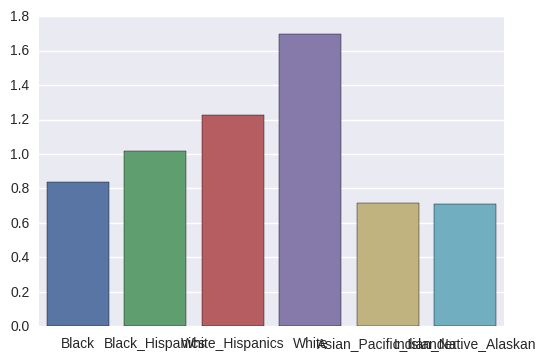

In [523]:
percent_of_weapons = weapons_per_race()

races = ["Black", "Black_Hispanics", "White_Hispanics", "White", "Asian_Pacific_Islander", "Indian_Native_Alaskan"]

seaborn.barplot(races, percent_of_weapons)
